<a href="https://colab.research.google.com/github/hungpham13/Distributed-data-discretization/blob/main/Data-preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import pyspark
# from pyspark.sql import SparkSession
# from pyspark.sql.types import StructType,StructField, StringType, IntegerType 
# from pyspark.sql.types import ArrayType, DoubleType, BooleanType
# from pyspark.sql.functions import col,array_contains

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2021 = pd.read_csv('diemthi2021.csv')
df2021['D1'].dropna().sample(n = 10000, random_state=1, ignore_index=True)

0       14.45
1       23.40
2       25.00
3       21.25
4       13.80
        ...  
9995    22.75
9996    21.25
9997    19.45
9998    25.55
9999    21.80
Name: D1, Length: 10000, dtype: float64

<AxesSubplot:xlabel='D1', ylabel='Count'>

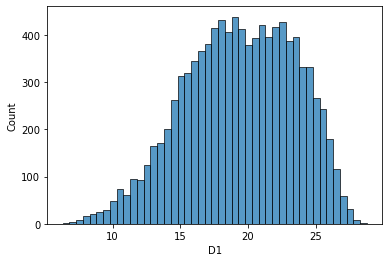

In [ ]:
sns.histplot(df2021['D1'].dropna().sample(n = 10000, ignore_index=True), binwidth=0.5)

<AxesSubplot:xlabel='D1', ylabel='Count'>

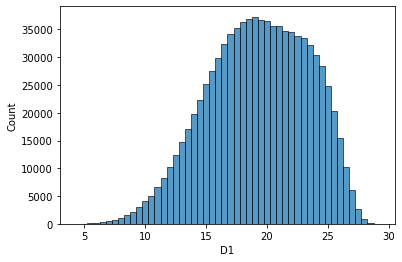

In [ ]:
sns.histplot(df2021['D1'].dropna(), binwidth=0.5)

In [ ]:
def data_create(num_sample = 10000, num_row = 450, year = 2021):
    data = []
    df = pd.read_csv('diemthi'+str(year)+'.csv')

    for i in range(num_row):
        data.append(list(df['D1'].dropna().sample(n = num_sample, ignore_index=True)))
        
    return np.array(data)

In [ ]:
data2021 = data_create(num_row=630)

In [ ]:
data2021.shape

(630, 10000)

In [ ]:
data2021

array([[15.6 , 23.5 , 19.5 , ..., 12.2 , 14.25, 12.7 ],
       [19.6 , 16.15, 21.6 , ..., 12.2 , 15.85, 15.95],
       [21.8 , 24.95, 16.85, ..., 20.85, 16.85, 19.55],
       ...,
       [19.5 , 17.6 , 22.15, ..., 27.1 , 16.05, 13.3 ],
       [18.25, 13.4 ,  8.05, ..., 20.2 , 19.05, 23.05],
       [16.95, 14.55, 21.1 , ..., 19.25, 25.75, 17.85]])

In [ ]:
# pd.DataFrame(data2021).to_csv('2021D1.csv')

In [ ]:
data2018 = data_create(num_row = 30, year = 2018)
data2019 = data_create(num_row = 20, year = 2019)
data2020 = data_create(num_row = 20, year = 2020)

data_other = np.append(data2018, data2019, axis=0)
data_other = np.append(data_other, data2020, axis=0)
data_other

array([[13.05, 18.35, 19.65, ..., 17.3 , 12.65, 15.75],
       [11.75, 13.2 , 10.55, ..., 18.85, 19.85, 13.2 ],
       [16.2 , 13.35, 14.5 , ..., 12.95, 20.9 ,  6.8 ],
       ...,
       [12.1 , 16.  , 15.6 , ..., 22.55, 19.3 , 19.85],
       [20.6 , 21.9 , 20.  , ..., 18.05, 22.75, 15.75],
       [20.8 , 13.05, 20.65, ..., 17.25,  6.  , 15.7 ]])

In [ ]:
# pd.DataFrame(data_other).to_csv('OtherD1.csv')

In [ ]:
df2018 = pd.read_csv('diemthi2018.csv')
df2019 = pd.read_csv('diemthi2019.csv')
df2020 = pd.read_csv('diemthi2020.csv')

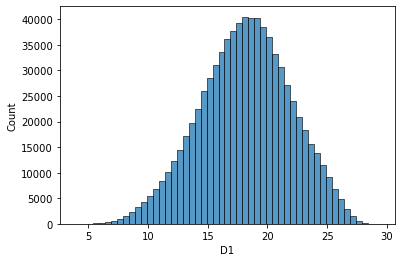

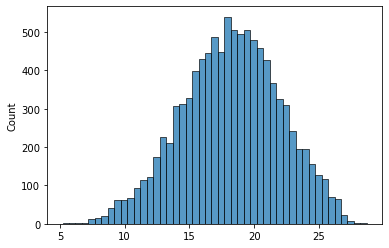

In [ ]:
sns.histplot(df2020['D1'].dropna(), binwidth=0.5)
plt.show()

sns.histplot(data2020[0], binwidth=0.5)
plt.show()

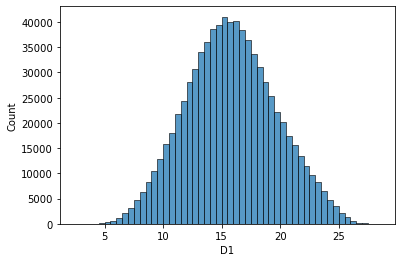

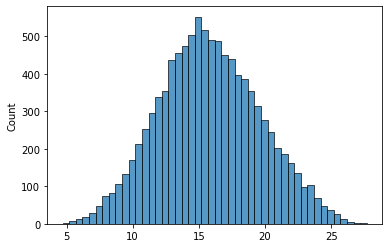

In [ ]:
sns.histplot(df2019['D1'].dropna(), binwidth=0.5)
plt.show()

sns.histplot(data2019[0], binwidth=0.5)
plt.show()

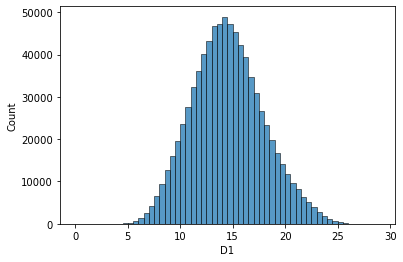

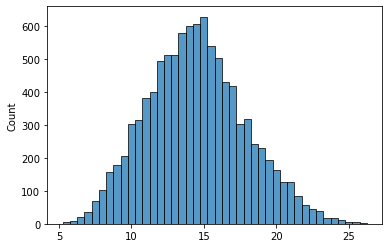

In [ ]:
sns.histplot(df2018['D1'].dropna(), binwidth=0.5)
plt.show()

sns.histplot(data2018[0], binwidth=0.5)
plt.show()

<AxesSubplot:xlabel='D1', ylabel='Density'>

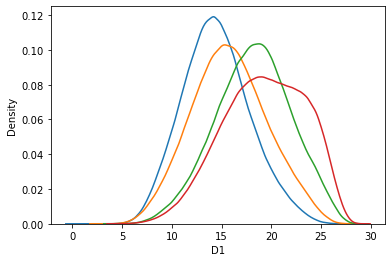

In [ ]:
sns.kdeplot(data = df2018, x = 'D1')
sns.kdeplot(data = df2019, x = 'D1')
sns.kdeplot(data = df2020, x = 'D1')
sns.kdeplot(data = df2021, x = 'D1')

<AxesSubplot:ylabel='Density'>

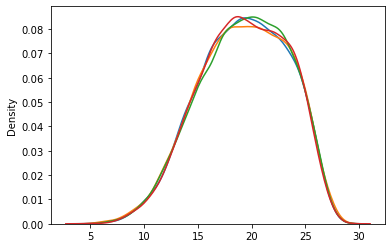

In [ ]:
sns.kdeplot(data2021[0])
sns.kdeplot(data2021[1])
sns.kdeplot(data2021[2])
sns.kdeplot(data2021[100])

In [ ]:
sns.kdeplot(data = df2018, x = 'D1')
sns.kdeplot(data = df2019, x = 'D1')
sns.kdeplot(data = df2020, x = 'D1')
sns.kdeplot(data = df2021, x = 'D1')

In [ ]:
sns.kdeplot(data2021[0])
sns.kdeplot(data2021[1])
sns.kdeplot(data2021[2])
sns.kdeplot(data2021[100])

In [22]:
import random
!python -m pip install iteration_utilities
from iteration_utilities import random_combination


def generate_shape(bin, num_sample=10000):
    mu_range = [0,1]
    sigma_range = [0.05,0.5]
    result = []
    config = []
    for _ in range(bin):
        mu = random.uniform(mu_range[0], mu_range[1])
        sigma = random.uniform(sigma_range[0], sigma_range[1])
        config.append((mu,sigma))
        s = np.random.normal(mu, sigma, round(num_sample/bin)).tolist()
        result.extend(s)
    return config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 283 kB 4.3 MB/s 


In [73]:
def generate_true_dist(config, num_sample=10000, linestyle='-'):
    result = []
    partial_num = round(num_sample/len(config))
    for (mu,sigma) in config:
        s = np.random.normal(mu, sigma, partial_num).tolist()
        result.extend(s)
    sns.kdeplot(result, linestyle=linestyle)
    return result

def modify_config(config):
    i = np.random.randint(len(config))
    result = config
    for i in random_combination(range(len(config)), r=round(len(config)*0.5)):
        mu_shift = random.uniform(-0.2, -0.1)
        sigma_shift = random.uniform(0.1,0.2)
        result = result[:i] + [(result[i][0] + mu_shift, result[i][1] + sigma_shift)] + result[i+1:]
    return result

def generate_false_dist(config, num_sample=10000):
    return generate_true_dist(modify_config(config), num_sample,linestyle='--')

def generate_data(num_true, num_false, bin, num_sample=10000):
    config = generate_shape(bin, num_sample)
    data = []
    for _ in range(num_true):
        true = generate_true_dist(config, num_sample) + [1]
        data.append(true)
    for _ in range(num_false):
        false = generate_false_dist(config, num_sample) + [0]
        data.append(false)
    data = pd.DataFrame(data)
    data.columns = [*data.columns[:-1], 'Label']
    return data


,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Label
0,0.212134,0.222812,0.188663,0.233940,0.154469,0.228300,0.241259,0.239416,0.467775,0.434473,...,0.774286,0.850405,0.831264,0.862121,0.818932,0.790282,0.903341,0.813631,0.902099,1
1,0.079124,0.279668,0.283541,0.332118,0.229417,0.223344,0.405627,0.207037,0.181895,0.248400,...,0.797844,0.940353,0.831663,0.923440,0.855055,0.835208,0.861596,0.663933,0.885723,0
2,0.040699,0.358315,0.123450,-0.350727,-0.077645,0.488953,-0.409598,-0.196734,0.065679,-0.091354,...,0.897445,0.810894,0.771446,0.749649,0.857793,0.873099,0.813034,0.783025,0.831700,0
3,-0.197465,0.241708,-0.113753,-0.287020,-0.315791,0.227821,-0.190466,0.045155,0.031403,0.269710,...,0.794150,0.734516,0.788384,0.887332,0.719629,0.774226,0.903797,0.806242,0.817784,0


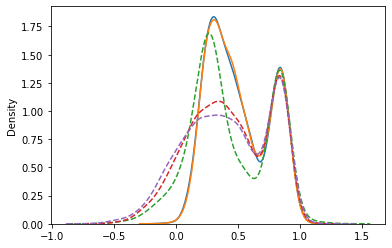

In [74]:
data = generate_data(1, 3, bin = 4)
data

In [25]:
print(config)
modify_config(config)

[(0.5786097772250287, 0.2737735307987706), (0.11285548609332607, 0.3924859358380745), (0.7106600888737327, 0.25499179776620434), (0.6041583905617758, 0.3618069733581104)]


[(0.2154159548670656, 0.6647772923003439),
 (-0.26938201025903175, 0.712352891011435),
 (0.5535076189648584, 0.5536997992377867),
 (0.6041583905617758, 0.3618069733581104)]

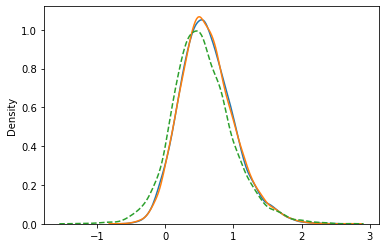

In [33]:
config = generate_shape(4)
s = generate_true_dist(config)
s2 = generate_false_dist(config)

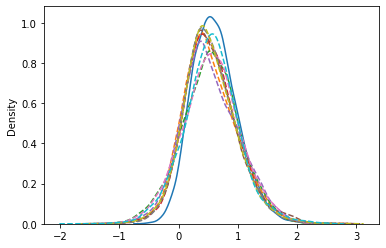

In [39]:
s = generate_true_dist(config)
# s = generate_true_dist(config)
# s = generate_true_dist(config)
# s = generate_true_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)

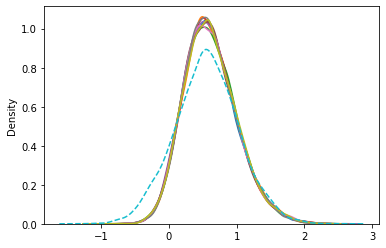

In [40]:
s = generate_true_dist(config)
s = generate_true_dist(config)
s = generate_true_dist(config)
s = generate_true_dist(config)
s = generate_true_dist(config)
s = generate_true_dist(config)
s = generate_true_dist(config)
s = generate_true_dist(config)
s = generate_true_dist(config)
s2 = generate_false_dist(config)